In [105]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [106]:
df = pd.read_csv("ML_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,Lead Machine Learning Engineer,70000,EUR,77777,FI,50,FI,L
1,2024,EN,FT,ML Engineer,27000,USD,27000,TR,0,TR,S
2,2024,MI,FT,Data Scientist,114000,CHF,129545,CH,50,CH,L
3,2024,EN,FT,Machine Learning Research Engineer,105000,CAD,80769,CA,50,CA,M
4,2024,SE,FT,Business Intelligence Engineer,108500,USD,108500,US,100,US,M


In [107]:
X = df[["experience_level", "employment_type", "job_title", "employee_residence", "remote_ratio", "company_location", "company_size"]]
y = df["salary_in_usd"]

In [108]:
X = X.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
X.head()

,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,3,2,102,29,50,25,0
1,0,2,103,81,0,72,2
2,2,2,79,14,50,13,0
3,0,2,112,12,50,11,1
4,3,2,28,84,100,74,1


In [109]:
# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2)

In [110]:
class DropoutNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob):
        super(DropoutNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size//2)
        self.fc3 = nn.Linear(hidden_size//2, hidden_size//4)
        self.fc4 = nn.Linear(hidden_size//4, output_size)
        self.dropout = nn.Dropout(p=dropout_prob)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc4(x)
        x = self.relu(x)
        return x

In [111]:
# Instantiate the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 400
output_size = 1
dropout_prob = 0.2
model = DropoutNet(input_size, hidden_size, output_size, dropout_prob)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [112]:
# Train the model (new version)
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
with torch.no_grad():
    model.eval()
    outputs = model(X_test)
    test_loss = criterion(outputs, y_test.view(-1, 1))
    print(f'Test Loss: {test_loss.item():.4f}')

Epoch [10/100], Loss: 16739016704.0000
Epoch [20/100], Loss: 4643488768.0000
Epoch [30/100], Loss: 4416535040.0000
Epoch [40/100], Loss: 4430114304.0000
Epoch [50/100], Loss: 4431394816.0000
Epoch [60/100], Loss: 4346264576.0000
Epoch [70/100], Loss: 4274601984.0000
Epoch [80/100], Loss: 4281280000.0000
Epoch [90/100], Loss: 4245555200.0000
Epoch [100/100], Loss: 4217363712.0000
Test Loss: 3969605888.0000


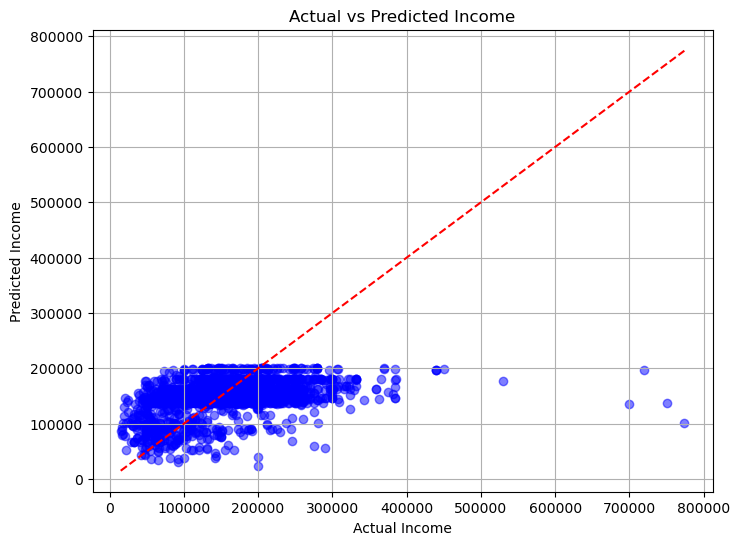

In [113]:
import matplotlib.pyplot as plt

# Convert tensors to numpy arrays
y_test_array = y_test.numpy().flatten()
predicted_array = outputs.numpy().flatten()

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_array, predicted_array, color='blue', alpha=0.5)
plt.plot([min(y_test_array), max(y_test_array)], [min(y_test_array), max(y_test_array)], color='red', linestyle='--')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.title('Actual vs Predicted Income')
plt.grid(True)
plt.show()

In [115]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("ML_salaries.csv")
df.head()

X = df[["experience_level", "employment_type", "job_title", "employee_residence", "remote_ratio", "company_location", "company_size"]]
y = df["salary_in_usd"]

X = X.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2)

class DropoutNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob):
        super(DropoutNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size//2)
        self.fc3 = nn.Linear(hidden_size//2, output_size)
        self.dropout = nn.Dropout(p=dropout_prob)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.relu(x)
        return x

# Instantiate the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 400
output_size = 1
dropout_prob = 0.2
model = DropoutNet(input_size, hidden_size, output_size, dropout_prob)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model (new version)
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
with torch.no_grad():
    model.eval()
    outputs = model(X_test)
    test_loss = criterion(outputs, y_test.view(-1, 1))
    print(f'Test Loss: {test_loss.item():.4f}')

Epoch [10/100], Loss: 24516780032.0000
Epoch [20/100], Loss: 10695641088.0000
Epoch [30/100], Loss: 7418490880.0000
Epoch [40/100], Loss: 4925861376.0000
Epoch [50/100], Loss: 4382896640.0000
Epoch [60/100], Loss: 4348569600.0000
Epoch [70/100], Loss: 4337415168.0000
Epoch [80/100], Loss: 4284239104.0000
Epoch [90/100], Loss: 4256306432.0000
Epoch [100/100], Loss: 4260113152.0000
Test Loss: 4087148800.0000


Epoch [10/100], Loss: 24814438400.0000
Epoch [20/100], Loss: 15089925120.0000
Epoch [30/100], Loss: 14618616832.0000
Epoch [40/100], Loss: 13583394816.0000
Epoch [50/100], Loss: 12853693440.0000
Epoch [60/100], Loss: 12552843264.0000
Epoch [70/100], Loss: 12219582464.0000
Epoch [80/100], Loss: 11739700224.0000
Epoch [90/100], Loss: 11635024896.0000
Epoch [100/100], Loss: 11558205440.0000
Test Loss: 6454547456.0000


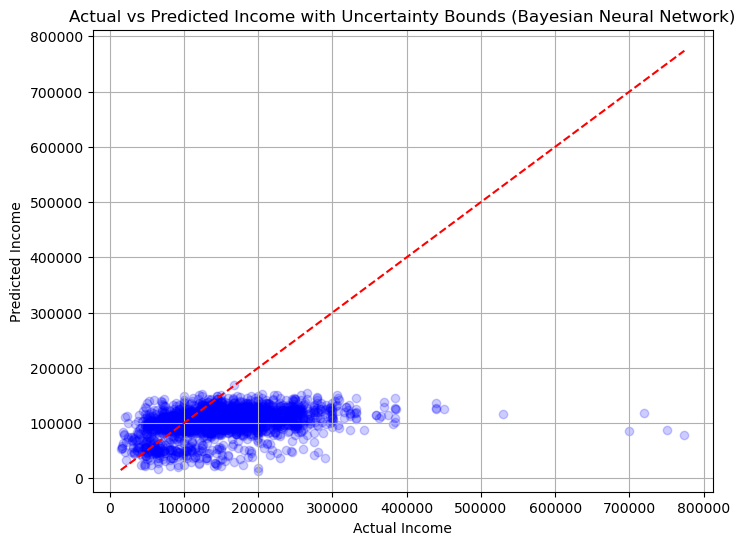

In [132]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("ML_salaries.csv")

X = df[["experience_level", "employment_type", "job_title", "employee_residence", "remote_ratio", "company_location", "company_size"]]
y = df["salary_in_usd"]

X = X.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2)

class BayesianDropoutNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob):
        super(BayesianDropoutNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size//2)
        self.fc3 = nn.Linear(hidden_size//2, output_size)
        self.relu = nn.ReLU()

        # Dropout layer for Bayesian approximation
        self.dropout = nn.Dropout(p=dropout_prob)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Instantiate the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 400
output_size = 1
dropout_prob = 0.98
model = BayesianDropoutNet(input_size, hidden_size, output_size, dropout_prob)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model (BNN version with dropout)
num_epochs = 100
for epoch in range(num_epochs):
    # Enable dropout during training
    model.train()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
with torch.no_grad():
    # Enable dropout during evaluation
    model.train()

    # Perform Monte Carlo sampling to estimate predictions and uncertainty
    n_samples = 100
    predictions = torch.zeros(n_samples, len(X_test))
    for i in range(n_samples):
        outputs = model(X_test)
        predictions[i] = outputs.squeeze()

    # Compute mean prediction and standard deviation as uncertainty estimate
    prediction_mean = predictions.mean(dim=0)
    prediction_std = predictions.std(dim=0)
    
    # Compute test loss using mean prediction
    test_loss = criterion(prediction_mean.view(-1, 1), y_test.view(-1, 1))
    print(f'Test Loss: {test_loss.item():.4f}') 

# Plot predictions with uncertainty bounds
plt.figure(figsize=(8, 6))
plt.scatter(y_test.numpy(), prediction_mean.numpy(), color="blue", alpha=0.2)
#plt.errorbar(y_test.numpy(), prediction_mean.numpy(), yerr=prediction_std.numpy(), fmt='o', color='magenta', alpha=0.3)
plt.plot([min(y_test.numpy()), max(y_test.numpy())], [min(y_test.numpy()), max(y_test.numpy())], color='red', linestyle='--')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.title('Actual vs Predicted Income with Uncertainty Bounds (Bayesian Neural Network)')
plt.grid(True)
plt.show()

In [138]:
y_train

tensor([-0.5325, -0.1445, -0.8033,  ...,  2.0516,  1.7073, -0.3641])

Epoch [10/200], Loss: 23270868992.0000
Epoch [20/200], Loss: 23176947712.0000
Epoch [30/200], Loss: 21630212096.0000
Epoch [40/200], Loss: 26373033984.0000
Epoch [50/200], Loss: 24069343232.0000
Epoch [60/200], Loss: 21741774848.0000
Epoch [70/200], Loss: 21415454720.0000
Epoch [80/200], Loss: 26138054656.0000
Epoch [90/200], Loss: 23446386688.0000
Epoch [100/200], Loss: 23670665216.0000
Epoch [110/200], Loss: 22964570112.0000
Epoch [120/200], Loss: 22411331584.0000
Epoch [130/200], Loss: 21921472512.0000
Epoch [140/200], Loss: 21680771072.0000
Epoch [150/200], Loss: 21846224896.0000
Epoch [160/200], Loss: 22324045824.0000
Epoch [170/200], Loss: 22684993536.0000
Epoch [180/200], Loss: 23270443008.0000
Epoch [190/200], Loss: 21359618048.0000
Epoch [200/200], Loss: 20339720192.0000
Test Loss: 20402186240.0000


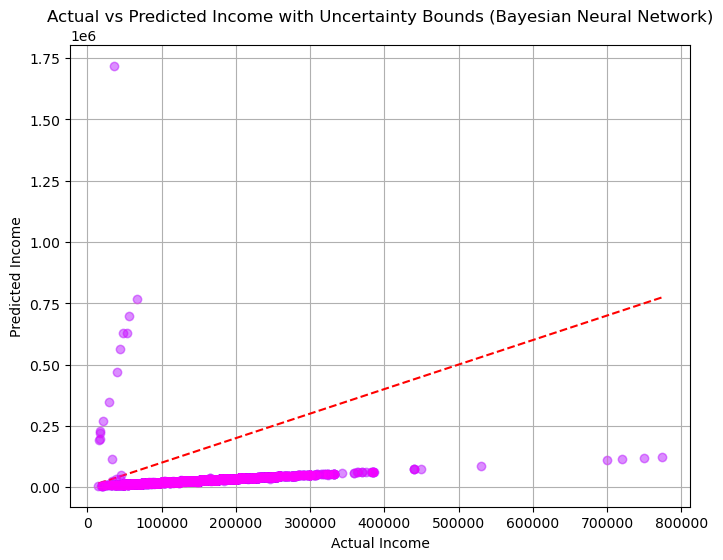

In [139]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv("ML_salaries.csv")

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

## Scale numerical variables
#scaler = StandardScaler()
#df[df.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

# Define X and y
X = df.drop(columns=["salary_in_usd"])
y = df["salary_in_usd"]

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2)

class BayesianDropoutNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, dropout_prob):
        super(BayesianDropoutNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.relu = nn.ReLU()

        # Dropout layer for Bayesian approximation
        self.dropout = nn.Dropout(p=dropout_prob)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Instantiate the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size1 = 512
hidden_size2 = 256
output_size = 1
dropout_prob = 0.5  # Lower dropout probability
model = BayesianDropoutNet(input_size, hidden_size1, hidden_size2, output_size, dropout_prob)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Lower learning rate

# Train the model (BNN version with dropout)
num_epochs = 200  # Increase number of epochs
for epoch in range(num_epochs):
    # Enable dropout during training
    model.train()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
with torch.no_grad():
    # Disable dropout during evaluation
    model.eval()

    # Perform Monte Carlo sampling to estimate predictions and uncertainty
    n_samples = 100
    predictions = torch.zeros(n_samples, len(X_test))
    for i in range(n_samples):
        outputs = model(X_test)
        predictions[i] = outputs.squeeze()

    # Compute mean prediction and standard deviation as uncertainty estimate
    prediction_mean = predictions.mean(dim=0)
    prediction_std = predictions.std(dim=0)
    
    # Compute test loss using mean prediction
    test_loss = criterion(prediction_mean.view(-1, 1), y_test.view(-1, 1))
    print(f'Test Loss: {test_loss.item():.4f}') 

# Plot predictions with uncertainty bounds
plt.figure(figsize=(8, 6))
plt.scatter(y_test.numpy(), prediction_mean.numpy(), color="blue", alpha=0.2)
plt.errorbar(y_test.numpy(), prediction_mean.numpy(), yerr=prediction_std.numpy(), fmt='o', color='magenta', alpha=0.3)
plt.plot([min(y_test.numpy()), max(y_test.numpy())], [min(y_test.numpy()), max(y_test.numpy())], color='red', linestyle='--')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.title('Actual vs Predicted Income with Uncertainty Bounds (Bayesian Neural Network)')
plt.grid(True)
plt.show()


Epoch [10/200], Loss: 0.8060
Epoch [20/200], Loss: 0.7905
Epoch [30/200], Loss: 0.7775
Epoch [40/200], Loss: 0.7760
Epoch [50/200], Loss: 0.7747
Epoch [60/200], Loss: 0.7596
Epoch [70/200], Loss: 0.7658
Epoch [80/200], Loss: 0.7588
Epoch [90/200], Loss: 0.7557
Epoch [100/200], Loss: 0.7536
Epoch [110/200], Loss: 0.7519
Epoch [120/200], Loss: 0.7473
Epoch [130/200], Loss: 0.7438
Epoch [140/200], Loss: 0.7437
Epoch [150/200], Loss: 0.7437
Epoch [160/200], Loss: 0.7425
Epoch [170/200], Loss: 0.7338
Epoch [180/200], Loss: 0.7403
Epoch [190/200], Loss: 0.7343
Epoch [200/200], Loss: 0.7300
Test Loss: 0.7323


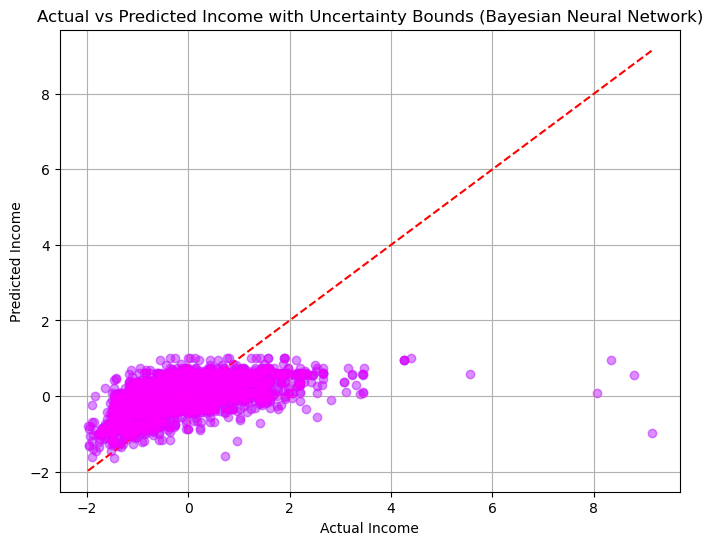

In [148]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv("ML_salaries.csv")

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Scale numerical variables
scaler = StandardScaler()
df[df.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

# Define X and y
X = df.drop(columns=["salary_in_usd", "salary"])
y = df["salary_in_usd"]

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2)

class BayesianDropoutNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, dropout_prob):
        super(BayesianDropoutNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.relu = nn.ReLU()

        # Dropout layer for Bayesian approximation
        self.dropout = nn.Dropout(p=dropout_prob)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Instantiate the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size1 = 512
hidden_size2 = 256
output_size = 1
dropout_prob = 0.5  # Lower dropout probability
model = BayesianDropoutNet(input_size, hidden_size1, hidden_size2, output_size, dropout_prob)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Lower learning rate

# Train the model (BNN version with dropout)
num_epochs = 200  # Increase number of epochs
for epoch in range(num_epochs):
    # Enable dropout during training
    model.train()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
with torch.no_grad():
    # Disable dropout during evaluation
    model.eval()

    # Perform Monte Carlo sampling to estimate predictions and uncertainty
    n_samples = 100
    predictions = torch.zeros(n_samples, len(X_test))
    for i in range(n_samples):
        outputs = model(X_test)
        predictions[i] = outputs.squeeze()

    # Compute mean prediction and standard deviation as uncertainty estimate
    prediction_mean = predictions.mean(dim=0)
    prediction_std = predictions.std(dim=0)
    
    # Compute test loss using mean prediction
    test_loss = criterion(prediction_mean.view(-1, 1), y_test.view(-1, 1))
    print(f'Test Loss: {test_loss.item():.4f}') 

# Plot predictions with uncertainty bounds
plt.figure(figsize=(8, 6))
plt.scatter(y_test.numpy(), prediction_mean.numpy(), color="blue", alpha=0.2)
plt.errorbar(y_test.numpy(), prediction_mean.numpy(), yerr=prediction_std.numpy(), fmt='o', color='magenta', alpha=0.3)  # Add error bars
plt.plot([min(y_test.numpy()), max(y_test.numpy())], [min(y_test.numpy()), max(y_test.numpy())], color='red', linestyle='--')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.title('Actual vs Predicted Income with Uncertainty Bounds (Bayesian Neural Network)')
plt.grid(True)
plt.show()

Epoch [10/200], Loss: 0.8060
Epoch [20/200], Loss: 0.7905
Epoch [30/200], Loss: 0.7775
Epoch [40/200], Loss: 0.7760
Epoch [50/200], Loss: 0.7747
Epoch [60/200], Loss: 0.7596
Epoch [70/200], Loss: 0.7658
Epoch [80/200], Loss: 0.7588
Epoch [90/200], Loss: 0.7557
Epoch [100/200], Loss: 0.7536
Epoch [110/200], Loss: 0.7519
Epoch [120/200], Loss: 0.7473
Epoch [130/200], Loss: 0.7438
Epoch [140/200], Loss: 0.7437
Epoch [150/200], Loss: 0.7437
Epoch [160/200], Loss: 0.7425
Epoch [170/200], Loss: 0.7338
Epoch [180/200], Loss: 0.7403
Epoch [190/200], Loss: 0.7343
Epoch [200/200], Loss: 0.7300
Test Loss: 0.7323


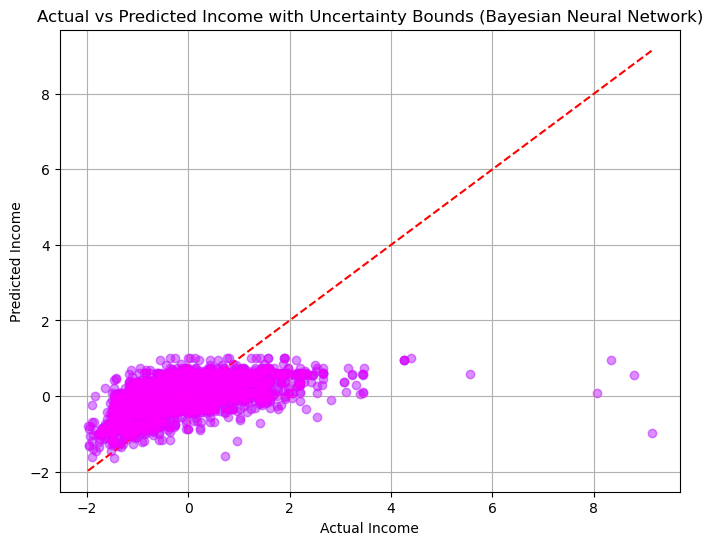

In [148]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv("ML_salaries.csv")

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Scale numerical variables
scaler = StandardScaler()
df[df.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

# Define X and y
X = df.drop(columns=["salary_in_usd", "salary"])
y = df["salary_in_usd"]

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2)

class BayesianDropoutNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, dropout_prob):
        super(BayesianDropoutNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.relu = nn.ReLU()

        # Dropout layer for Bayesian approximation
        self.dropout = nn.Dropout(p=dropout_prob)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Instantiate the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size1 = 512
hidden_size2 = 256
output_size = 1
dropout_prob = 0.5  # Lower dropout probability
model = BayesianDropoutNet(input_size, hidden_size1, hidden_size2, output_size, dropout_prob)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Lower learning rate

# Train the model (BNN version with dropout)
num_epochs = 200  # Increase number of epochs
for epoch in range(num_epochs):
    # Enable dropout during training
    model.train()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
with torch.no_grad():
    # Disable dropout during evaluation
    model.eval()

    # Perform Monte Carlo sampling to estimate predictions and uncertainty
    n_samples = 100
    predictions = torch.zeros(n_samples, len(X_test))
    for i in range(n_samples):
        outputs = model(X_test)
        predictions[i] = outputs.squeeze()

    # Compute mean prediction and standard deviation as uncertainty estimate
    prediction_mean = predictions.mean(dim=0)
    prediction_std = predictions.std(dim=0)
    
    # Compute test loss using mean prediction
    test_loss = criterion(prediction_mean.view(-1, 1), y_test.view(-1, 1))
    print(f'Test Loss: {test_loss.item():.4f}') 

# Plot predictions with uncertainty bounds
plt.figure(figsize=(8, 6))
plt.scatter(y_test.numpy(), prediction_mean.numpy(), color="blue", alpha=0.2)
plt.errorbar(y_test.numpy(), prediction_mean.numpy(), yerr=prediction_std.numpy(), fmt='o', color='magenta', alpha=0.3)  # Add error bars
plt.plot([min(y_test.numpy()), max(y_test.numpy())], [min(y_test.numpy()), max(y_test.numpy())], color='red', linestyle='--')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.title('Actual vs Predicted Income with Uncertainty Bounds (Bayesian Neural Network)')
plt.grid(True)
plt.show()

In [160]:
# Convert y_test to NumPy array
y_test_numpy = y_test.numpy()

# Reverse scaling for visualization
y_test_orig = scaler.inverse_transform(y_test_numpy.reshape(-1, 1)).flatten()
prediction_mean_orig = scaler.inverse_transform(prediction_mean.reshape(-1, 1)).flatten()
prediction_std_orig = prediction_std * scaler.scale_[0]  # Only use scaling factor for target variable

# Plot feature importance scores
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features)), [imp.mean() for _, imp in sorted_features], align='center')  # Use mean importance value
plt.yticks(range(len(sorted_features)), [feat for feat, _ in sorted_features])
plt.xlabel('Mean Absolute Weight')
plt.ylabel('Feature')
plt.title('Feature Importance Scores')
plt.show()

ValueError: non-broadcastable output operand with shape (2672,1) doesn't match the broadcast shape (2672,11)

In [144]:
print("Shapes:")
print("y_test:", y_test.shape)
print("Scaler scale:", scaler.scale_.shape)
print("Scaler mean:", scaler.mean_.shape)

Shapes:
y_test: torch.Size([2672])
Scaler scale: (11,)
Scaler mean: (11,)


In [137]:
prediction_std.numpy()

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

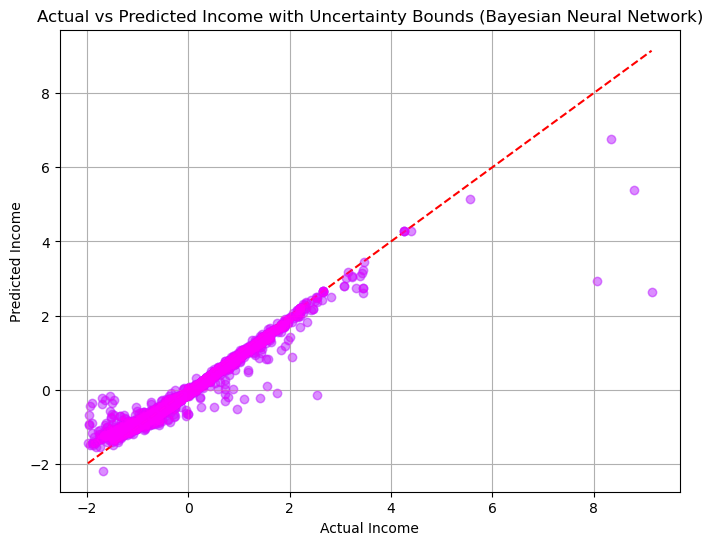

In [136]:
# Scale factor for error bars
scale_factor = 10

# Plot predictions with uncertainty bounds
plt.figure(figsize=(8, 6))
plt.scatter(y_test.numpy(), prediction_mean.numpy(), color="blue", alpha=0.2)
plt.errorbar(y_test.numpy(), prediction_mean.numpy(), yerr=scale_factor * prediction_std.numpy(), fmt='o', color='magenta', alpha=0.3)  # Add error bars
plt.plot([min(y_test.numpy()), max(y_test.numpy())], [min(y_test.numpy()), max(y_test.numpy())], color='red', linestyle='--')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.title('Actual vs Predicted Income with Uncertainty Bounds (Bayesian Neural Network)')
plt.grid(True)
plt.show()

In [151]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyro
import pyro.distributions as dist
from pyro.nn import PyroModule
from pyro.infer.autoguide import AutoDiagonalNormal
from pyro.infer import TraceMeanField_ELBO

# Load data
df = pd.read_csv("ML_salaries.csv")

# Encode categorical variables
for column in df.select_dtypes(include=['object']):
    df[column] = LabelEncoder().fit_transform(df[column])

# Scale numerical variables
scaler = StandardScaler()
df[df.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

# Define X and y
X = df.drop(columns=["salary_in_usd", "salary"])
y = df["salary_in_usd"]

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2)

# Define Bayesian neural network class
class BayesianNN(PyroModule):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super().__init__()
        self.fc1 = PyroModule[nn.Linear](input_size, hidden_size1)
        self.fc2 = PyroModule[nn.Linear](hidden_size1, hidden_size2)
        self.fc3 = PyroModule[nn.Linear](hidden_size2, output_size)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define guide function
guide = AutoDiagonalNormal(BayesianNN)

# Define ELBO loss
loss_fn = TraceMeanField_ELBO()

# Training loop
num_iterations = 1000
optimizer = optim.Adam(list(model.parameters()) + list(guide.parameters()), lr=0.01)
for j in range(num_iterations):
    optimizer.zero_grad()
    with pyro.poutine.trace() as tr:
        loss = loss_fn.model_guide(model, guide, X_train, y_train)
    loss.backward()
    optimizer.step()

# Define function for prediction with uncertainty bounds
def predict(x):
    predictive = pyro.infer.Predictive(model, guide=guide, num_samples=1000,
                                       return_sites=("fc3",))
    samples = predictive(x)
    mean = samples["fc3"].mean(0)
    std = 1.96 * samples["fc3"].std(0)  # 95% interval
    return mean, std

# Perform prediction on test data
mean_pred, std_pred = predict(X_test)

# Plot predictions with uncertainty bounds
plt.figure(figsize=(8, 6))
plt.scatter(y_test.numpy(), mean_pred.detach().numpy(), color="blue", alpha=0.2)
plt.errorbar(y_test.numpy(), mean_pred.detach().numpy(), yerr=std_pred.detach().numpy(), fmt='o', color='magenta', alpha=0.3)
plt.plot([min(y_test.numpy()), max(y_test.numpy())], [min(y_test.numpy()), max(y_test.numpy())], color='red', linestyle='--')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.title('Actual vs Predicted Income with Uncertainty Bounds (Bayesian Neural Network)')
plt.grid(True)
plt.show()


AttributeError: 'TraceMeanField_ELBO' object has no attribute 'model_guide'

In [159]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyro
import pyro.distributions as dist
from pyro.nn import PyroModule
from pyro.infer import SVI, Trace_ELBO
from pyro.contrib.nn import PyroSample, PyroParam, PyroModule
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv("ML_salaries.csv")

# Encode categorical variables
for column in df.select_dtypes(include=['object']):
    df[column] = LabelEncoder().fit_transform(df[column])

# Scale numerical variables
scaler = StandardScaler()
df[df.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

# Define X and y
X = df.drop(columns=["salary_in_usd", "salary"])
y = df["salary_in_usd"]

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2)

# Define Bayesian neural network class
class BayesianNN(PyroModule):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = PyroModule[nn.Linear](input_size, hidden_size)
        self.fc2 = PyroModule[nn.Linear](hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
    


ModuleNotFoundError: No module named 'pyro.contrib.nn'